#Pre Processing


##Set up the environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

##1. Read Dataset


In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("First few rows of the dataset:")
print(df.head())
print("========\nDataset information:")
print(df.info())
print("========\nDescriptive statistics:")
print(df.describe())

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Descriptive statistics:
               

##2. Explore the Data


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check for categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [6]:
print("\nCategorical columns:", list(categorical_columns))
print("Numerical columns:", list(numerical_columns))


Categorical columns: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


In [7]:
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    df[col] = df[col].astype('category')

print("\nDatatypes after conversion:")
print(df.dtypes)


print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"========\n{col} unique values:")
    print(df[col].value_counts())


Datatypes after conversion:
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Unique values in categorical columns:
sex unique values:
sex
male      676
female    662
Name: count, dtype: int64
smoker unique values:
smoker
no     1064
yes     274
Name: count, dtype: int64
region unique values:
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


In [8]:
print("Number of missing values in each column:")
print(df.isnull().sum())
print("========\nPercentage of missing values in each column:")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages)

Number of missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Percentage of missing values in each column:
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


##3. Handle Missing Values


No missing or null values.


##4. Outlier Detection and Treatment


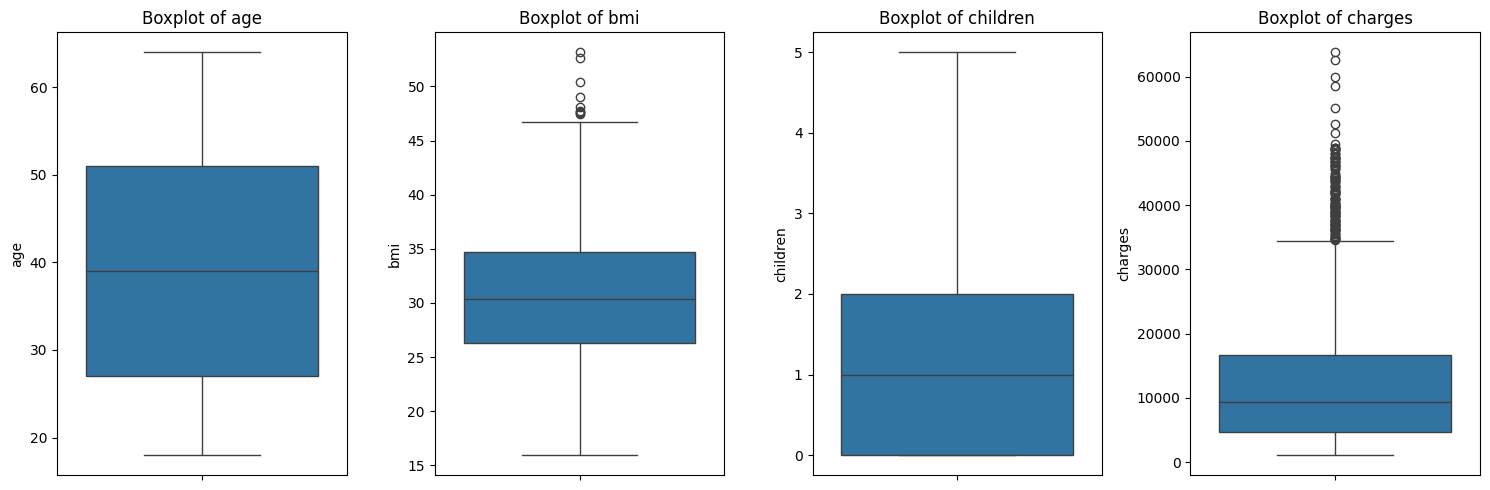

In [9]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

We see a lot of outliers in charges and a few outliers in bmi.


In [10]:
def get_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [11]:
print("\nOutlier Summary Before Treatment:")
for col in numerical_columns:
    lower_bound, upper_bound = get_bounds(df[col])
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    # Example: df[(df[col] < lower_bound) | (df[col] > upper_bound)][bmi] ==> values higher or lower than the quartiles
    print(f"========\n{col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    if len(outliers) > 0:
        print(f"Outlier values: \n{outliers.value_counts().head()}")


Outlier Summary Before Treatment:
age:
Number of outliers: 0
Lower bound: -9.00
Upper bound: 87.00
bmi:
Number of outliers: 9
Lower bound: 13.70
Upper bound: 47.29
Outlier values: 
bmi
49.06    1
48.07    1
47.52    1
47.41    1
50.38    1
Name: count, dtype: int64
children:
Number of outliers: 0
Lower bound: -3.00
Upper bound: 5.00
charges:
Number of outliers: 139
Lower bound: -13109.15
Upper bound: 34489.35
Outlier values: 
charges
39611.7577    1
36837.4670    1
37701.8768    1
38711.0000    1
35585.5760    1
Name: count, dtype: int64


###Capping Outliers


In [12]:
df_capped = df.copy()
for col in numerical_columns:
    lower_bound, upper_bound = get_bounds(df[col])
    original_values = df_capped[col].copy()

    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    n_capped = (original_values != df_capped[col]).sum()
    print(f"Number of values capped in {col}: {n_capped}\n========")

Number of values capped in age: 0
Number of values capped in bmi: 9
Number of values capped in children: 0
Number of values capped in charges: 139


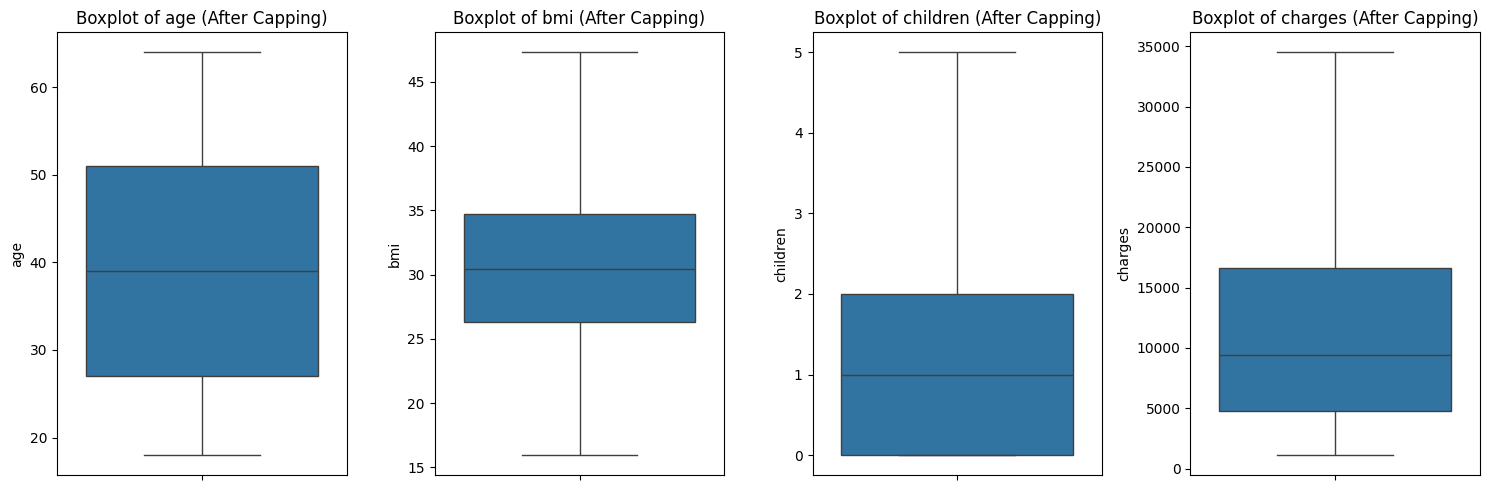

In [13]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_capped[col])
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

### Handle Categorical Outliers (rare categories)


In [14]:
print("\nCategorical Value Frequencies:")
for col in categorical_columns:
    value_counts = df_capped[col].value_counts()
    print(f"========\n{col}:")
    print(value_counts)

    # Define rare categories (e.g., less than 5% of total)
    threshold = len(df_capped) * 0.05
    rare_categories = value_counts[value_counts < threshold].index

    if len(rare_categories) > 0:
        print(f"Rare categories in {col} (less than 5%): {
              list(rare_categories)}")
        # Replace rare categories with mode
        mode_category = df_capped[col].mode()[0]
        df_capped.loc[df_capped[col].isin(
            rare_categories), col] = mode_category
        print(f"Replaced with mode: {mode_category}")


Categorical Value Frequencies:
sex:
sex
male      676
female    662
Name: count, dtype: int64
smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64
region:
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


**Conclusion:** No rare categories


##5. Check for Duplicates


In [15]:
duplicate_count = df_capped.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df_capped[df_capped.duplicated(keep='first')])

    # Remove duplicates and keep the first occurrence
    df_capped = df_capped.drop_duplicates(keep='first')
    print(f"\nShape of dataset before removing duplicates: {df.shape}")
    print(f"Shape of dataset after removing duplicates: {df_capped.shape}")
    print(f"Number of rows removed: {df.shape[0] - df_capped.shape[0]}")
else:
    print("\nNo duplicate rows found in the dataset!")

Number of duplicate rows: 1

Duplicate rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Shape of dataset before removing duplicates: (1338, 7)
Shape of dataset after removing duplicates: (1337, 7)
Number of rows removed: 1


In [16]:
final_duplicate_check = df_capped.duplicated().sum()
print(f"\nFinal duplicate count: {final_duplicate_check}")


Final duplicate count: 0


##6. Drop Low-Variance Columns


In [17]:
numerical_variances = df_capped[numerical_columns].var()
print("Variances of numerical columns:")
print(numerical_variances)

Variances of numerical columns:
age         1.972433e+02
bmi         3.671381e+01
children    1.453402e+00
charges     1.031753e+08
dtype: float64


In [18]:
numerical_cv = df_capped[numerical_columns].std(
) / df_capped[numerical_columns].mean() * 100


print("\nCoefficient of Variation (%) of numerical columns:")


print(numerical_cv)


Coefficient of Variation (%) of numerical columns:
age          35.807156
bmi          19.768928
children    110.023823
charges      81.341696
dtype: float64


In [19]:
NUMERICAL_VARIANCE_THRESHOLD = 0.01
low_variance_numerical = numerical_variances[numerical_variances <
                                             NUMERICAL_VARIANCE_THRESHOLD].index.tolist()
print("\nLow variance columns:")
print("Numerical:", low_variance_numerical)


Low variance columns:
Numerical: []


**Conclusion:** No columns to drop.


In [20]:
# Remove low variance columns if any exist
if low_variance_numerical:
    print(f"\nRemoving {len(low_variance_numerical)
                        } low variance columns: {low_variance_numerical}")
    df_capped = df_capped.drop(columns=low_variance_numerical)
    print(f"Remaining columns: {df_capped.columns.tolist()}")
else:
    print("\nNo low variance columns found to remove!")

# Print final shape of dataset
print(f"\nFinal dataset shape: {df_capped.shape}")


No low variance columns found to remove!

Final dataset shape: (1337, 7)


##7. Feature and Label Separation


In [21]:
target = 'charges'
X = df_capped.drop(columns=[target])
y = df_capped[target]
print(f"Features (X): {X.shape}")
print(f"Label (y): {y.shape}\n=================")
print(X.head())
print(f"=================")
print(y.head())

Features (X): (1337, 6)
Label (y): (1337,)
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


##8. Encoding Categorical Columns


In [22]:
print("Number of unique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {X[col].nunique()} categories")
    print(f"Categories: {X[col].unique()}\n")

Number of unique values in categorical columns:
sex: 2 categories
Categories: ['female', 'male']
Categories (2, object): ['female', 'male']

smoker: 2 categories
Categories: ['yes', 'no']
Categories (2, object): ['no', 'yes']

region: 4 categories
Categories: ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']



In [23]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(X[categorical_columns])

In [24]:
encoded_feature_names = []
for i, column in enumerate(categorical_columns):
    categories = encoder.categories_[i][1:]
    encoded_feature_names.extend([f"{column}_{cat}" for cat in categories])

encoded_df = pd.DataFrame(
    encoded_features, columns=encoded_feature_names, index=X.index)

In [25]:
if 'charges' in numerical_columns:
    numerical_columns = numerical_columns.difference(['charges'])
    print(f"Numerical columns after removing 'charges': {numerical_columns}")
numerical_features = X[numerical_columns]
X_encoded = pd.concat([numerical_features, encoded_df], axis=1)

Numerical columns after removing 'charges': Index(['age', 'bmi', 'children'], dtype='object')


In [26]:
print("\nShape of dataset after encoding:", X_encoded.shape)
X_encoded.head()


Shape of dataset after encoding: (1337, 8)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,1.0,0.0,0.0


# Model Building


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)


-------------------- Linear Regression --------------------

Training Metrics:
MAE: $3426.22
MSE: $27358018.75
RMSE: $5230.49
R² Score: 0.7253

Test Metrics:
MAE: $3147.62
MSE: $20870491.48
RMSE: $4568.42
R² Score: 0.8211

Feature Coefficients:
            Feature   Coefficient
4        smoker_yes  19644.617684
6  region_southeast   -709.955714
7  region_southwest   -536.616401
2          children    462.756881
5  region_northwest   -246.101545
0               age    223.603617
3          sex_male   -218.333284
1               bmi    216.654750

-------------------- Decision Tree --------------------

Training Metrics:
MAE: $0.00
MSE: $0.00
RMSE: $0.00
R² Score: 1.0000

Test Metrics:
MAE: $2330.62
MSE: $29764391.53
RMSE: $5455.68
R² Score: 0.7448

Feature Importance:
            Feature  Importance
4        smoker_yes    0.595579
1               bmi    0.172767
0               age    0.161588
2          children    0.025299
5  region_northwest    0.019817
6  region_southeast    0.0099

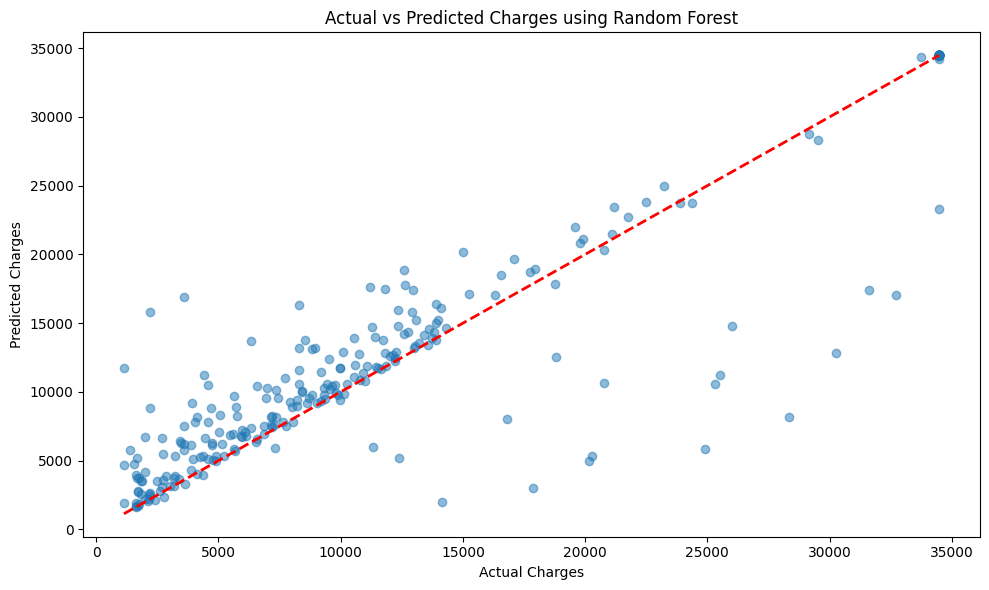

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'-'*20} {name} {'-'*20}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on both training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate metrics for training set
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)

    # Calculate metrics for test set
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)

    # Store results
    results[name] = {
        'train_mae': train_mae,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }

    # Print metrics
    print("\nTraining Metrics:")
    print(f"MAE: ${train_mae:.2f}")
    print(f"MSE: ${train_mse:.2f}")
    print(f"RMSE: ${train_rmse:.2f}")
    print(f"R² Score: {train_r2:.4f}")

    print("\nTest Metrics:")
    print(f"MAE: ${test_mae:.2f}")
    print(f"MSE: ${test_mse:.2f}")
    print(f"RMSE: ${test_rmse:.2f}")
    print(f"R² Score: {test_r2:.4f}")

    # For Linear Regression, print feature importance (coefficients)
    if name == 'Linear Regression':
        coef_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': model.coef_
        })
        print("\nFeature Coefficients:")
        print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

    # For Tree-based models and XGBoost, print feature importance
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        feat_imp = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        })
        print("\nFeature Importance:")
        print(feat_imp.sort_values(by='Importance', ascending=False))

# Compare models
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Train MAE': [results[model]['train_mae'] for model in results],
    'Test MAE': [results[model]['test_mae'] for model in results],
    'Train RMSE': [results[model]['train_rmse'] for model in results],
    'Test RMSE': [results[model]['test_rmse'] for model in results],
    'Train R²': [results[model]['train_r2'] for model in results],
    'Test R²': [results[model]['test_r2'] for model in results]
})

print("\nModel Comparison:")
print(comparison_df)

# Visualize predictions vs actual for best model
best_model_name = comparison_df.sort_values(by='Test MAE')['Model'].iloc[0]
best_model = models[best_model_name]
print(f"\nBest model is: {best_model_name}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Actual vs Predicted Charges using {best_model_name}')
plt.tight_layout()
plt.show()